In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\reza3\\OneDrive\\Desktop\\AIT\\Machine learning\\group project\\data\\appl_1980_2014.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
def clean_data(df):
    # Change column type to datetime64[ns] for column: 'Date'
    df = df.astype({'Date': 'datetime64[ns]'})
    return df

df = clean_data(df.copy())
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [5]:
cond = (df.Date.dt.year > 2009) & (df.Date.dt.year < 2014)
df = df[cond]
df.Date.dt.year.unique()

array([2013, 2012, 2011, 2010])

In [6]:
### Set date as index
df = df.set_index('Date')
df.index

DatetimeIndex(['2013-12-31', '2013-12-30', '2013-12-27', '2013-12-26',
               '2013-12-24', '2013-12-23', '2013-12-20', '2013-12-19',
               '2013-12-18', '2013-12-17',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## 2 EDA

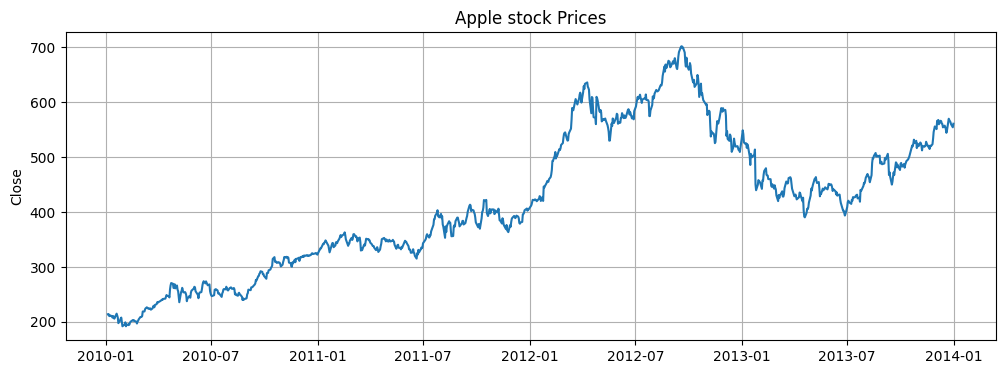

In [8]:
# plot the apple stocks
plt.figure(figsize = (12,4))
plt.title('Apple stock Prices')
plt.ylabel('Close')
plt.grid()
plt.plot(df.Close)

## 3. Train test spllit

In [10]:
# use all the past data, to predict the next 15 days
# input is everything untill now ...
# output is next 15 days
y = df['Close'].values.astype('float')
train_set = y[:-15]
test_set = y[-15:]

In [11]:
type(train_set)

numpy.ndarray

## 4. Normalization
we don't do standardization because mean is wrong . nor. -0 to 1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
train_set_norm = scaler.fit_transform(train_set.reshape(-1,1))

In [17]:
train_set_norm.min(), train_set_norm.max()

(-0.9999999999999999, 1.0)

5. Prepare train set

In [19]:
# conver np to tensor
train_set_norm = torch.FloatTensor(train_set_norm).view(-1)
train_set_norm.shape
# define windows size
ws = 30 # use 30 days in the past  to predict the next day
# define function to create training set (ws days -> 1 day)
def create_data(train,ws):
    data = []
    for i in range(train.shape[0] -ws):
        x = train[i:i + ws] # 30 days in the past
        y = train[i + ws: i+ws+1] # next
        data.append((x,y) ) #  #array to hold the data
   # i runs from 0 to (991 -30)
      # x = train[i:i + ws] # 30 days in the past
      # y = train[i + ws: i+ws+1] # next
    return data
chaky_data = create_data(train_set_norm,30)  

In [20]:
chaky_data

[(tensor([0.4468, 0.4213, 0.4432, 0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066,
          0.4232, 0.4330, 0.4210, 0.4449, 0.4481, 0.4646, 0.4680, 0.4429, 0.4738,
          0.4624, 0.4676, 0.4084, 0.4274, 0.3877, 0.3385, 0.3006, 0.2852, 0.2904,
          0.2663, 0.2842, 0.2806]),
  tensor([0.3055])),
 (tensor([0.4213, 0.4432, 0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066, 0.4232,
          0.4330, 0.4210, 0.4449, 0.4481, 0.4646, 0.4680, 0.4429, 0.4738, 0.4624,
          0.4676, 0.4084, 0.4274, 0.3877, 0.3385, 0.3006, 0.2852, 0.2904, 0.2663,
          0.2842, 0.2806, 0.3055]),
  tensor([0.3179])),
 (tensor([0.4432, 0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066, 0.4232, 0.4330,
          0.4210, 0.4449, 0.4481, 0.4646, 0.4680, 0.4429, 0.4738, 0.4624, 0.4676,
          0.4084, 0.4274, 0.3877, 0.3385, 0.3006, 0.2852, 0.2904, 0.2663, 0.2842,
          0.2806, 0.3055, 0.3179]),
  tensor([0.2884])),
 (tensor([0.4581, 0.4729, 0.4824, 0.3997, 0.3819, 0.4066, 0.4232, 0.4330, 0.4210,
         

## 6.neural network
A variant of RNN called LSTM, which is very powerful

In [21]:
input_ = chaky_data[0]

In [26]:
sample, target = chaky_data[0]
sample_reshape = sample.reshape(sample.shape[0],1,-1)
lstm = nn.LSTM(1,50)
out, hidden =lstm(sample_reshape)


In [29]:
out.shape, hidden[0].shape

(torch.Size([30, 1, 50]), torch.Size([1, 1, 50]))

In [40]:
class chaky_RNN(nn.Module):
    def __init__(self, input_s = 1, hs = 50, output_size = 1):
        super().__init__()
        self.hs = hs
        self.lstm = nn.LSTM(input_s, hs)  #LSTM will automatically create W(s) for us
        self.linear = nn.Linear(hs, output_size)  #take output of LSTM, project to prediction
        
    def forward(self, input_):
        out,_ = self.lstm(input_.reshape(input_.shape[0], 1, -1)) #30, 1, 1
        out = self.linear(out.view(len(input_), -1))  #30, 50
        return out[-1]

In [30]:
out = out.view(len(out),-1)

In [31]:
Linear = nn.Linear(50,1)

In [53]:
torch.manual_seed(999)
model = chaky_RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [55]:
epochs = 1 
for i in range(epochs):
    for x,y in chaky_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hs), torch.zeros(1,1,model.hs))
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
    print(f'Last loss:', loss.item())
    
    

Last loss: 0.0006202098447829485
